$1$

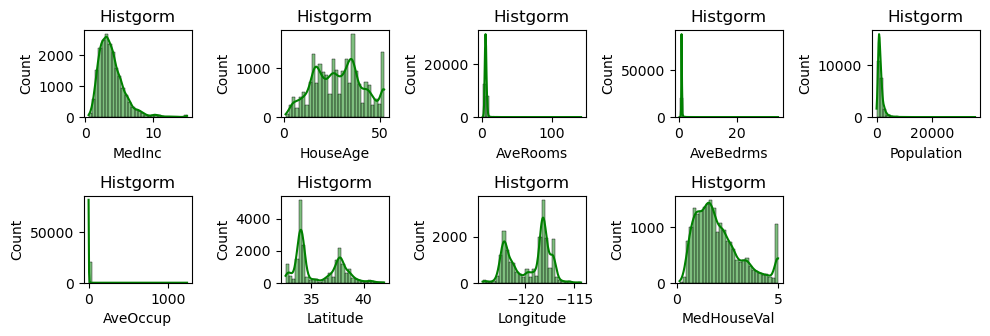

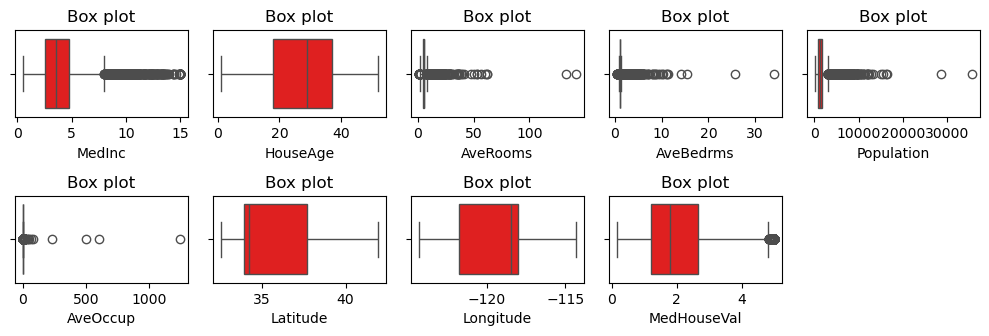

Outliers Summary
 MedInc : 758 outliers 
 HouseAge : 1100 outliers 
 AveRooms : 1502 outliers 
 AveBedrms : 1744 outliers 
 Population : 909 outliers 
 AveOccup : 1659 outliers 
 Latitude : 0 outliers 
 Longitude : 158 outliers 
 MedHouseVal : 125 outliers 
Data Summary
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOcc

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
dframe = data.frame 

nf = dframe.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10,8))
for i,feature in enumerate(nf):
    plt.subplot(5,5,i+1)
    sns.histplot(dframe[feature],kde=True,bins=30,color='g')
    plt.title("Histgorm")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
for i,feature in enumerate(nf):
    plt.subplot(5,5,i+1)
    sns.boxplot(x=dframe[feature],color='r')
    plt.title("Box plot")
plt.tight_layout()
plt.show()

print("Outliers Summary")
os={}
for feature in nf:
    q1= dframe[feature].quantile(0.25)
    q2= dframe[feature].quantile(0.75)
    ipr = q2-q1 
    lb = q1 - 1.5 * ipr
    up = q2 - 1.5 * ipr
    out = dframe[(dframe[feature] < lb ) | (dframe[feature] < up )]
    os[feature] = len(out)
    print(f" {feature} : {len(out)} outliers ")
print("Data Summary")
print(dframe.describe())


$2$

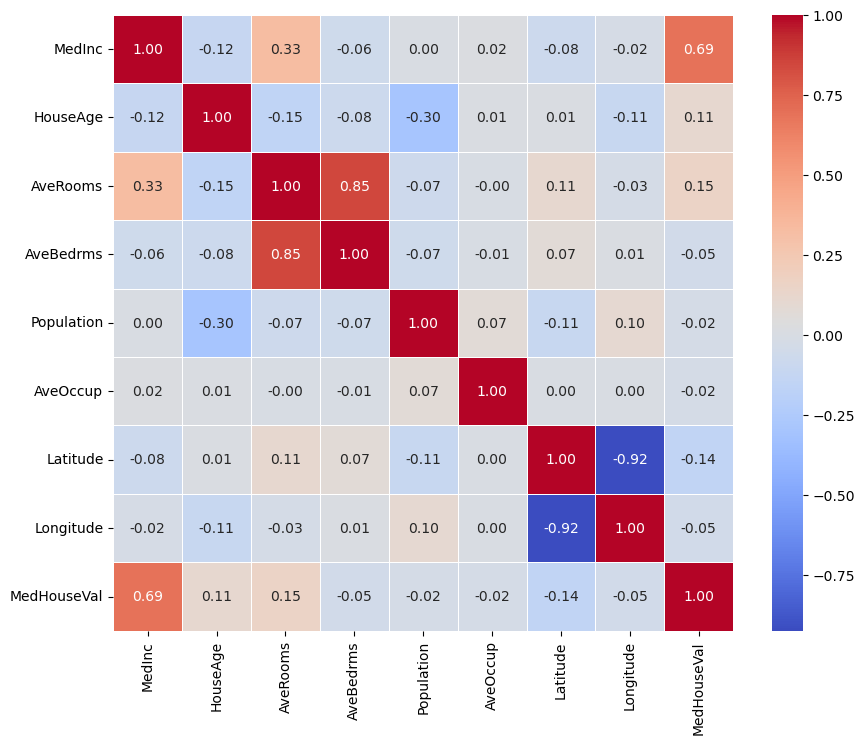

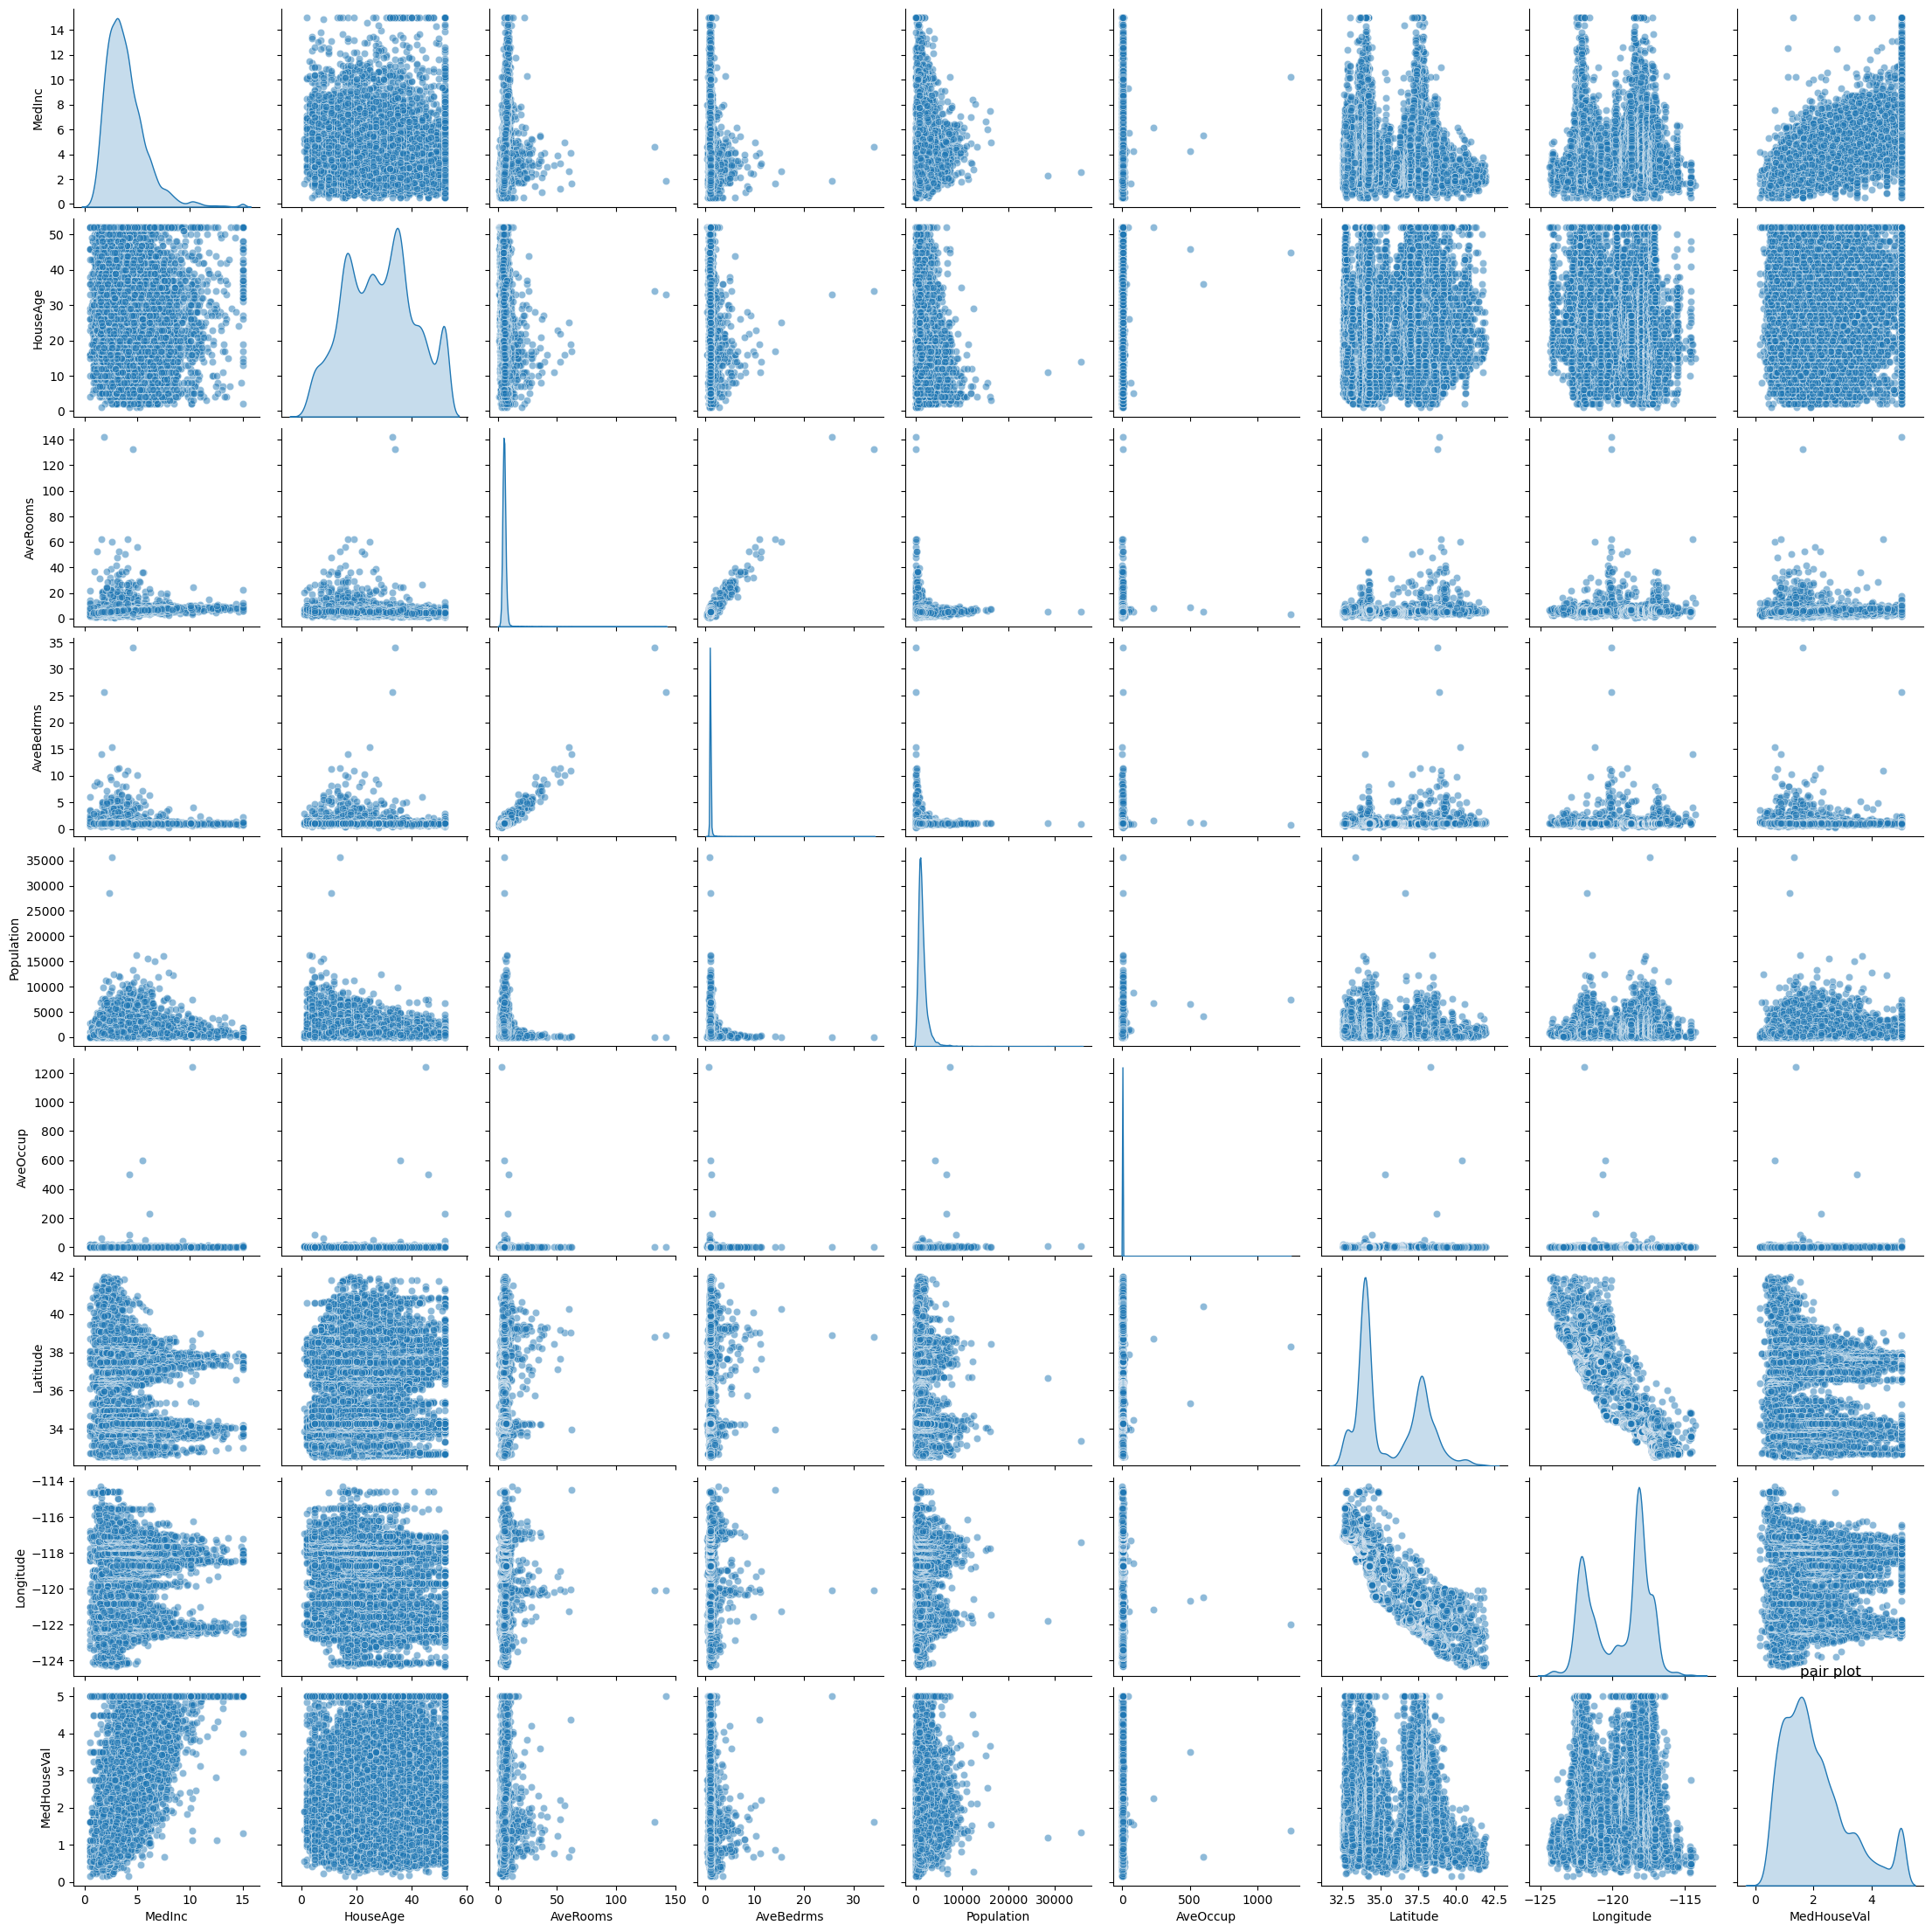

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame

cor = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,cmap='coolwarm',fmt=".2f" , linewidth=0.5)
plt.show()

sns.pairplot(df,diag_kind="kde",plot_kws={'alpha':0.5})
plt.title("pair plot",y=1.02)
plt.show()

$3$

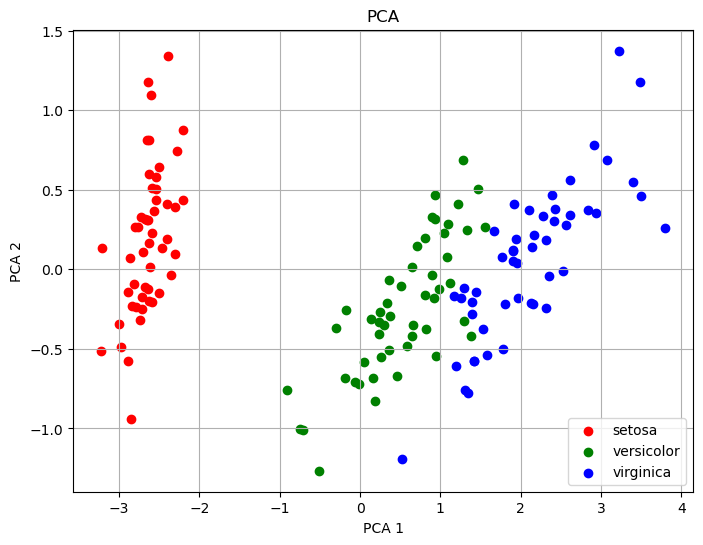

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition  import PCA

iris = load_iris()
data = iris.data
labels = iris.target
label_names = iris.target_names

iris_df = pd.DataFrame(data , columns=iris.feature_names)

pca = PCA(n_components=2)
iris_df = pca.fit_transform(data)

red_df = pd.DataFrame(iris_df , columns=['PCA 1' , 'PCA 2'])
red_df['Label'] = labels

plt.figure(figsize=(8,6))
colors = ['r','g','b']
for i,label in enumerate(np.unique(labels)):
    plt.scatter(
        red_df[red_df['Label'] == label]['PCA 1'],
        red_df[red_df['Label'] == label]['PCA 2'],
        label = label_names[label],
        color=colors[i]
    )
plt.title("PCA")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid()
plt.show()

        

$4$

In [4]:
import pandas as pd

def s_alg(file):
    data = pd.read_csv(file)
    print("Training dataset")
    print(data)
    att = data.columns[:-1]
    cls = data.columns[-1]
    hyp = ['\u2205' for _ in att ]
    for index,row in data.iterrows():
        if row[cls] == 'Yes' :
            for i,value in enumerate(row[att]):
                if hyp[i]=="\u2205" or hyp[i]==value:
                    hyp[i]=value
                else:
                    hyp[i]='?'
    return hyp

file="training_data.csv"
hypo = s_alg(file)
print(f"The final Hypothesis is",hypo)

Training dataset
    Outlook Temperature Humidity  Windy PlayTennis
0     Sunny         Hot     High  False         No
1     Sunny         Hot     High   True         No
2  Overcast         Hot     High  False        Yes
3      Rain        Cold     High  False        Yes
4      Rain        Cold     High   True         No
5  Overcast         Hot     High   True        Yes
6     Sunny         Hot     High  False         No
The final Hypothesis is ['?', '?', 'High', '?']


$6$

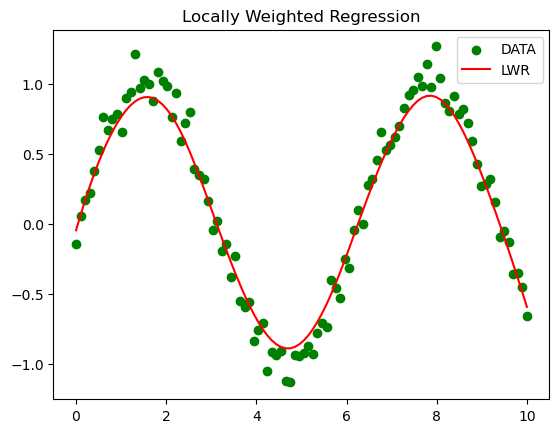

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("lwr_dataset.csv")
X,y = data[['X']].values,data['Y'].values

def lwr(X,y,tau=0.5):
    X_ =np.hstack([np.ones((X.shape[0],1)),X])
    x_vals = np.linspace(X.min(),X.max(),100)
    y_vals = []
    for x in x_vals:
        w = np.exp(-((X-x)**2) / (2*tau**2)).flatten()
        W = np.diag(w)
        theta = np.linalg.pinv(X_.T @ W @ X_) @ (X_.T @ W @ y)
        y_vals.append(np.array([1,x]) @ theta)
    plt.scatter(X,y,label='DATA',color='g')
    plt.plot(x_vals,y_vals,label='LWR',color = 'r')
    plt.legend()
    plt.title('Locally Weighted Regression')
    plt.show()
lwr(X,y)

$7 (a) $

 MSE : 25.02 , RMSE : 5.00 , R2 : 0.66


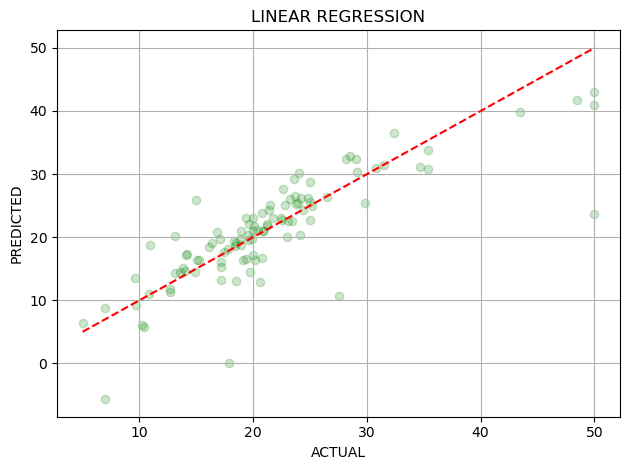

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error , r2_score

data = pd.read_csv("Boston.csv")
data.fillna(data.mean(),inplace=True)
X = data.drop(columns="MEDV")
y = data["MEDV"]

x_scaled = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print(f" MSE : {mse:.2f} , RMSE : {rmse:.2f} , R2 : {r2:.2f}")

plt.scatter(y_test,y_pred , alpha=0.2, color='g')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.title("LINEAR REGRESSION")
plt.xlabel("ACTUAL")
plt.ylabel("PREDICTED")
plt.grid(True)
plt.tight_layout()
plt.show()

$ 7 (b) $

D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


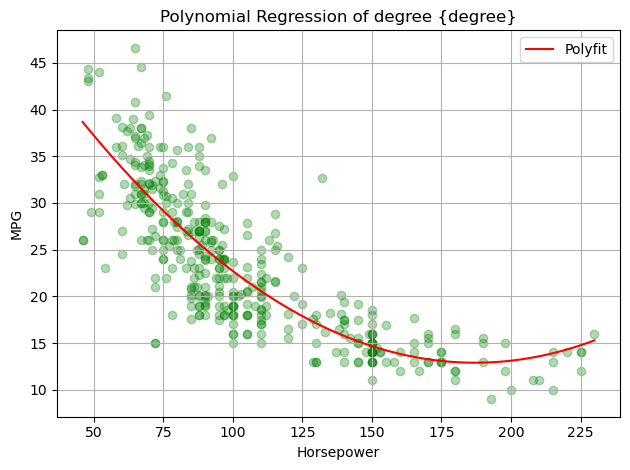

In [8]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

data = sns.load_dataset("mpg").dropna(subset= ['horsepower','mpg'])
X,y = data[["horsepower"]],data["mpg"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state=42)

degree = 2 
poly = PolynomialFeatures(degree)
model = LinearRegression().fit(poly.fit_transform(X_train),y_train)

x_range = np.linspace(X.min(),X.max(),200).reshape(-1,1)
y_range = model.predict(poly.transform(x_range))

plt.scatter(X,y,alpha=0.3,color='g')
plt.plot(x_range,y_range,color='r',label="Polyfit")
plt.title("Polynomial Regression of degree {degree}")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



$ 8 $

0.9473684210526315


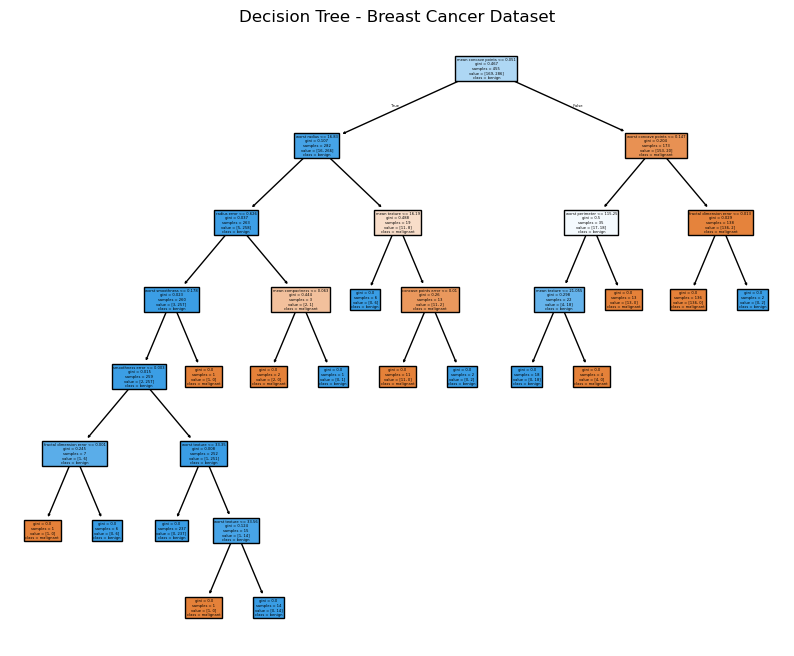

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier , plot_tree

data = load_breast_cancer()
X,y = data.data , data.target 

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model =  DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

plt.figure(figsize=(10,8))
plot_tree(model,filled=True, feature_names=data.feature_names , class_names = data.target_names)
plt.title('Decision Tree - Breast Cancer Dataset')
plt.show()

$ 9 $

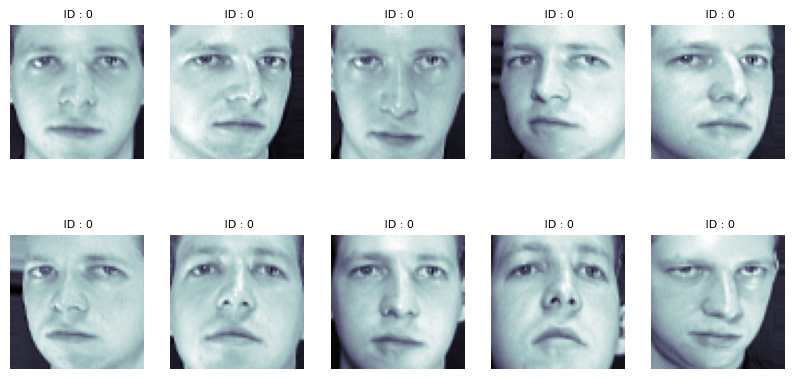

 Accuracy is : 92.40%


In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

df = fetch_olivetti_faces()
images , targets = df.images , df.target

fig , axes = plt.subplots(2,5,figsize=(10,5))

for i,ax in enumerate(axes.ravel()):
    ax.imshow(images[i],cmap='bone')
    ax.axis("off")
    ax.set_title(f" ID : {targets[i]}",fontsize=8)
plt.show()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
acc = accuracy_score(y_test, GaussianNB().fit(X_train,y_train).predict(X_test))
print(f" Accuracy is : {acc*100:.2f}%")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.clusters import KMeans
from sklearn.metrics import accuracy_score

X,y = fetch_breast_cancer(return_X_y=True)
kmeans = KMeans(n_clusters=2,n_init = 10, random_state=42).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

if accuracy_score(y,labels) < 0.5:
    labels = 1-labels
fig,axs = plt.subplots(1,3,figsize=(18,5))

axs[0].scatter(X[:,0],X[:,1],c=labels,cmap='viridis',alpha=0.6)
axs[0].set_title("K-Means Clustering")

axs[1].scatter(X[:,0],X[:,1],c=y,cmap='coolwarm',alpha=0.6)
axs[1].set_title("True labels")

axs[2].scatter(X[:,0],X[:,1],c=labels,cmap='viridis',alpha=0.6)
axs[2].scatter(centroids[:,0],centroids[:,1],c='black',s=200,marker='X')
axs[2].set_title("K-Means Clustering with centroids")

for ax in axs:
    ax.set